# Continuous Control

---

Congratulations for completing the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control an agent in a more challenging environment, where the goal is to train a creature with four arms to walk forward.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import numpy as np
import random
from collections import namedtuple, deque
import torch
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
from ppo_agent import PPO_Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [2]:
#env = UnityEnvironment(file_name='Crawler_Windows_x86_64/Crawler.exe')
env = UnityEnvironment(file_name='TetrapodeV1.5/Unity Environment.exe')
#env = UnityEnvironment(file_name='Crawler2/Unity Environment.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 185
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 24
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 12
Size of each action: 24
There are 12 agents. Each observes a state with length: 185
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.10699987e+00
  0.00000000e+00  9.99999940e-01  5.96046448e-08 -4.21468478e-08
  5.96046448e-08 -9.99999940e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.62814330e-02 -7.65792839e-03 -1.23599991e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.16201763e-02 -7.76397670e-03
 -1.66199971e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.2420

### Here we train the Agent

In [ ]:
agent = PPO_Agent(env=env, beta=0, learning_time=2, batch_size=1024,  constraint = 1.5)
#agent.network.load_state_dict(torch.load('MYTetrapode_Checkpoint.pth'))
rewards = agent.train(n_episode=1000, max_t=3000, standardlize='row', method='TD', load=False)

Episode 1. Total score 7.6, average score 1.0, past total average 7.6, past average 1.0, best 6.5, worst -3.1, time: 167s
Episode 2. Total score 10.2, average score 1.1, past total average 8.9, past average 1.1, best 6.0, worst -3.5, time: 329s
Episode 3. Total score 10.3, average score 1.1, past total average 9.4, past average 1.1, best 6.9, worst -6.2, time: 489s
Episode 4. Total score 14.5, average score 1.4, past total average 10.6, past average 1.2, best 7.8, worst -3.0, time: 648s


  ### End of Training Process

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.mean(np.array(rewards),axis=1))
plt.show()

### Load and watch a trained agent

 score 125.0


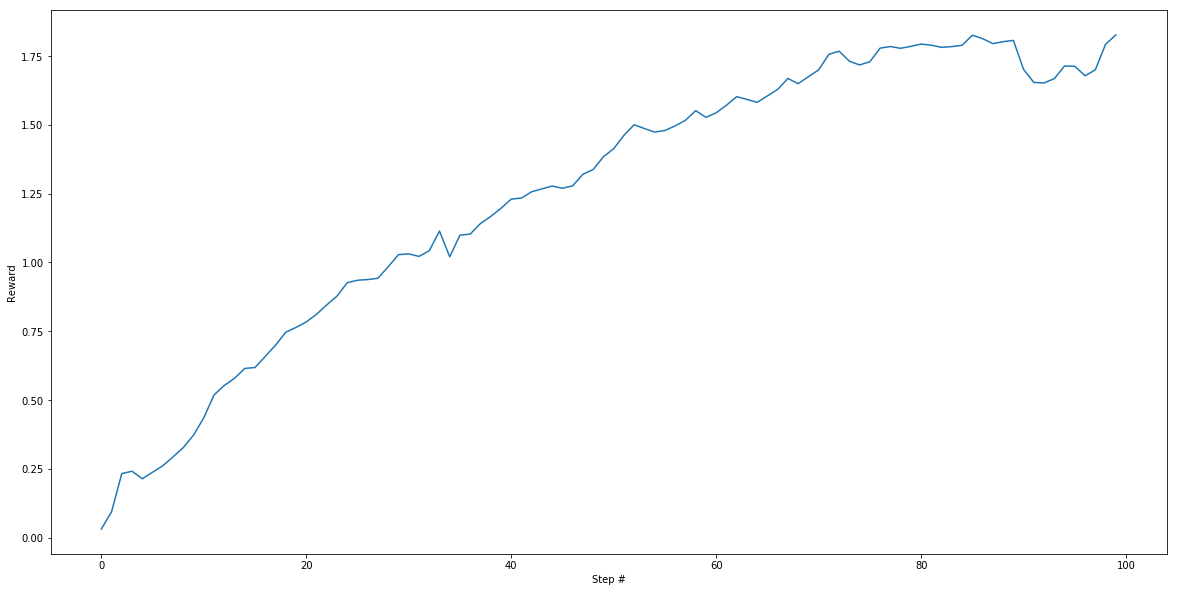

In [5]:
agent = PPO_Agent(env=env)
agent.network.load_state_dict(torch.load('MYTetrapode_checkpoint.pth'))
agent.network.eval()
rewards = agent.test(1000,'row')

When finished, you can close the environment.

In [6]:
env.close()

In [6]:
agent.network.eval()

PPO_Actor_Critic(
  (actor): Actor(
    (fc1_bn): BatchNorm1d(129, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc1): Linear(in_features=129, out_features=1024, bias=True)
    (fc2_bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc2): Linear(in_features=1024, out_features=1024, bias=True)
    (fc2a_bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc2a): Linear(in_features=1024, out_features=1024, bias=True)
    (fc3_bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc3): Linear(in_features=1024, out_features=20, bias=True)
  )
  (critic): Critic(
    (fc1_bn): BatchNorm1d(129, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc1): Linear(in_features=129, out_features=1024, bias=True)
    (fc2_bn): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc2): Linear(in_features=1024, ou

In [9]:
a = env_info.rewards
a.append(7)
a

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7]